## Kaggle에 있는 유럽의 중고차 데이터로 중고차 가격 예측을 해보았다.

- 직접 데이터를 수집해서 하려고 해 보았지만, 시간도 오래 걸리고 데이터의 개수가 적고, 데이터를 정제하는데에 시간이 너무 많이걸려서 kaggle에서 찾아보았다.
- kaggle에서 다운받은 데이터는 브랜드별로 나뉘어져있어서 우선 여러개의 데이터를 합쳤다.

#### 데이터 내의 Feature

transmission = 변속기

mileage = 주행거리

fuelType = 연료

tax = 세금

mpg = 연비

engineSize 배기량

In [1]:
import pandas as pd
audi = pd.read_csv('./data/audi.csv')
bmw = pd.read_csv('./data/bmw.csv')
ford = pd.read_csv('./data/ford.csv')
hyundi = pd.read_csv('./data/hyundi.csv')
toyota = pd.read_csv('./data/toyota.csv')

In [2]:
#audi
print('----------audi----------')
audi.info()
#bmw
print('----------bmw----------')
bmw.info()
#ford
print('----------ford----------')
ford.info()
#hyundi
print('----------hyundi----------')
hyundi.info()
#toyota
print('----------toyota----------')
toyota.info()

----------audi----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
----------bmw----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 n

In [3]:
#audi
print('----------audi----------')
print(audi.model.unique())
print(audi.year.unique())
print(audi.transmission.unique())
print(audi.fuelType.unique())
#bmw
print('----------bmw----------')
print(bmw.model.unique())
print(bmw.year.unique())
print(bmw.transmission.unique())
print(bmw.fuelType.unique())
#ford
print('----------ford----------')
print(audi.model.unique())
print(audi.year.unique())
print(audi.transmission.unique())
print(audi.fuelType.unique())
#hyundi
print('----------hyundi----------')
print(hyundi.model.unique())
print(hyundi.year.unique())
print(hyundi.transmission.unique())
print(hyundi.fuelType.unique())
#toyota
print('----------toyota----------')
print(toyota.model.unique())
print(toyota.year.unique())
print(toyota.transmission.unique())
print(toyota.fuelType.unique())

----------audi----------
[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
[2017 2016 2019 2015 2014 2018 2013 2020 2004 2009 2012 2010 2007 2011
 2008 2003 2005 2002 2006 1998 1997]
['Manual' 'Automatic' 'Semi-Auto']
['Petrol' 'Diesel' 'Hybrid']
----------bmw----------
[' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
[2014 2018 2016 2017 2015 2019 2013 2020 2002 2004 2007 2008 2011 2012
 2009 2006 2010 2003 2001 2005 2000 1999 1996 1997 1998]
['Automatic' 'Manual' 'Semi-Auto']
['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']
----------ford----------
[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
[2017 2016 20

In [4]:
print(audi.columns,
bmw.columns,
ford.columns,
hyundi.columns,
toyota.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object') Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object') Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object') Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax(£)', 'mpg', 'engineSize'],
      dtype='object') Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


In [5]:
#hyundi 혼자 컬럼명이 달라 수정
hyundi = hyundi.rename({'tax(£)':'tax'}, axis='columns')
hyundi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


In [6]:
len(audi)

10668

In [7]:
len(bmw)

10781

In [8]:
audi_a = audi.copy

In [9]:
audi.append(bmw)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [10]:
audi['brand'] = 'audi'
bmw['brand'] = 'bmw'
ford['brand'] = 'ford'
hyundi['brand'] = 'hyundi'
toyota['brand'] = 'toyota'

In [11]:
data = audi.append(bmw)
data = data.append(ford)
data = data.append(hyundi)
data = data.append(toyota)

In [12]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0,toyota
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3,toyota
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4,toyota
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3,toyota


In [13]:
print(len(audi)+len(bmw)+len(ford)+len(hyundi)+len(toyota))

51012


In [14]:
len(data)

51012

In [15]:
data = data.reset_index(drop=True)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
51007,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0,toyota
51008,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3,toyota
51009,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4,toyota
51010,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3,toyota


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         51012 non-null  object 
 1   year          51012 non-null  int64  
 2   price         51012 non-null  int64  
 3   transmission  51012 non-null  object 
 4   mileage       51012 non-null  int64  
 5   fuelType      51012 non-null  object 
 6   tax           51012 non-null  int64  
 7   mpg           51012 non-null  float64
 8   engineSize    51012 non-null  float64
 9   brand         51012 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.9+ MB


<AxesSubplot:xlabel='model', ylabel='count'>

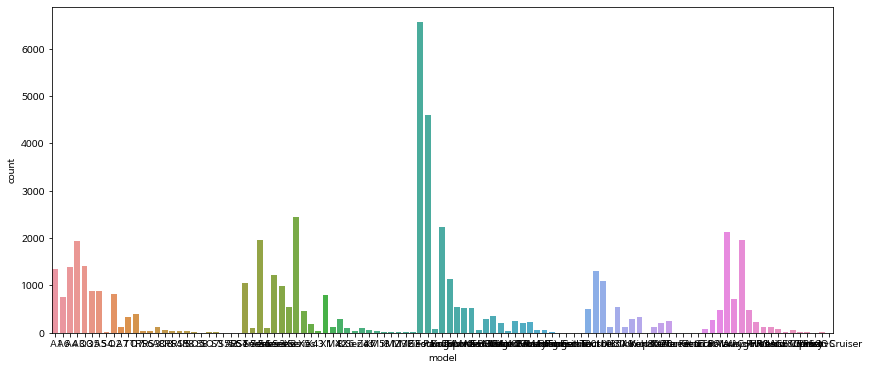

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,6))
sns.countplot(x='model',data=data)

<AxesSubplot:xlabel='year', ylabel='count'>

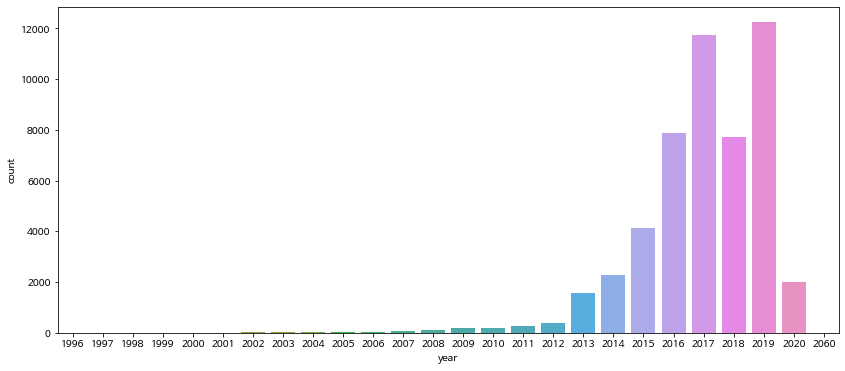

In [18]:
plt.figure(figsize=(14,6))
sns.countplot(x='year',data=data)

<AxesSubplot:xlabel='transmission', ylabel='count'>

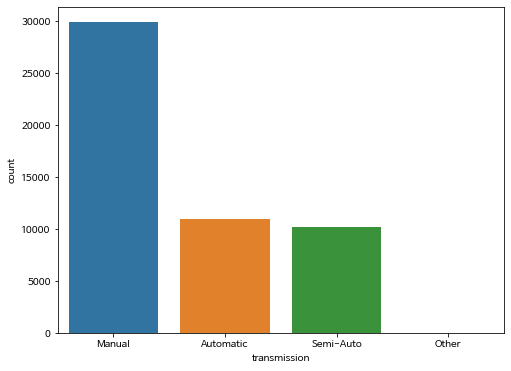

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='transmission',data=data)

<AxesSubplot:xlabel='fuelType', ylabel='count'>

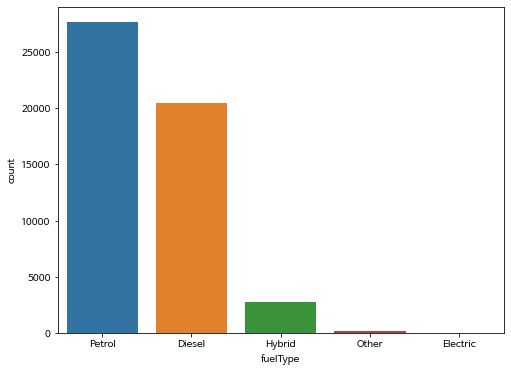

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='fuelType',data=data)

<AxesSubplot:xlabel='brand', ylabel='count'>

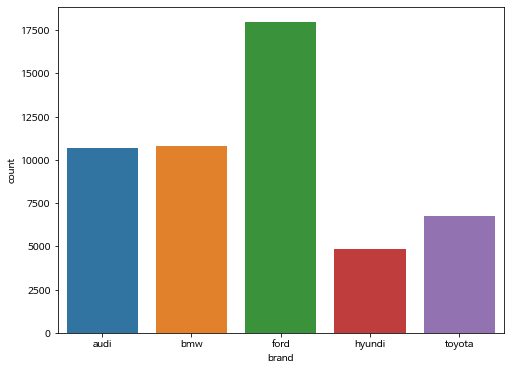

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='brand',data=data)

In [22]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000
mean,2016.967733,16786.208127,23874.835901,118.150043,56.385425,1.670866
std,2.154065,9963.982505,21502.554460,65.360378,18.470537,0.598870
min,1996.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,9999.000000,7898.750000,125.000000,47.900000,1.200000
50%,2017.000000,14490.000000,18300.500000,145.000000,56.500000,1.600000
75%,2019.000000,20481.000000,33161.500000,145.000000,64.200000,2.000000
max,2060.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


<AxesSubplot:>

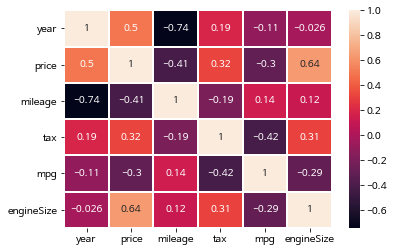

In [23]:
sns.heatmap(data.corr(), annot=True, linewidths=1)

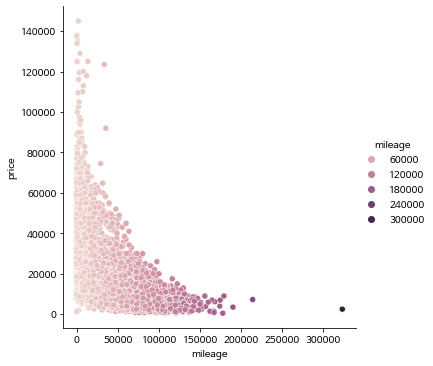

In [24]:
sns.relplot(x="mileage", y="price", hue='mileage', data=data)

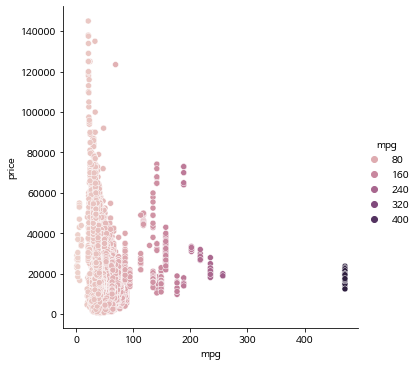

In [25]:
sns.relplot(x="mpg", y="price", hue='mpg', data=data)

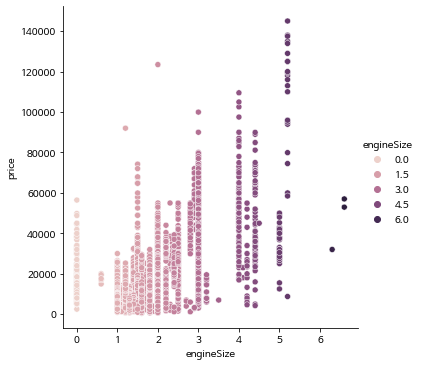

In [26]:
sns.relplot(x="engineSize", y="price", hue='engineSize', data=data)

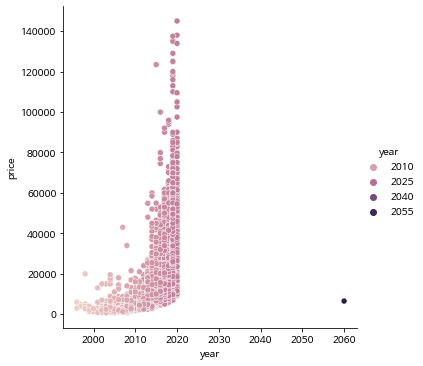

In [27]:
sns.relplot(x="year", y="price", hue='year', data=data)

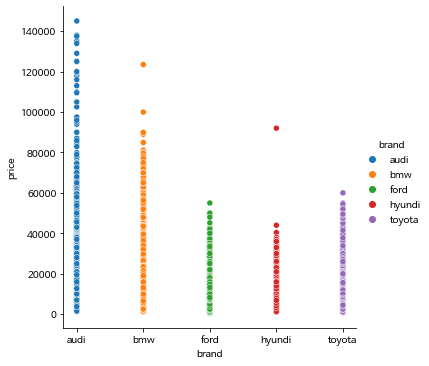

In [28]:
sns.relplot(x="brand", y="price", hue='brand', data=data)

In [29]:
data_c = data.copy()

In [30]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         51012 non-null  object 
 1   year          51012 non-null  int64  
 2   price         51012 non-null  int64  
 3   transmission  51012 non-null  object 
 4   mileage       51012 non-null  int64  
 5   fuelType      51012 non-null  object 
 6   tax           51012 non-null  int64  
 7   mpg           51012 non-null  float64
 8   engineSize    51012 non-null  float64
 9   brand         51012 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.9+ MB


pandas로 더미 데이터를 만들어보았지만, feature의 개수가 너무 많아져 LabelEncoder로 object를 변경

In [31]:
from sklearn.preprocessing import LabelEncoder

object_list = ['model', 'transmission', 'fuelType', 'brand']
for column in object_list:
    encoder = LabelEncoder()
    encoder.fit(data_c[f'{column}'])
    data_c[f'{column}'] = encoder.transform(data_c[f'{column}'])


In [32]:
data_c.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'brand'],
      dtype='object')

In [33]:
data_c

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,8,2017,12500,1,15735,4,150,55.4,1.4,0
1,13,2016,16500,0,36203,0,20,64.2,2.0,0
2,8,2016,11000,1,29946,4,30,55.4,1.4,0
3,11,2017,16800,0,25952,0,145,67.3,2.0,0
4,10,2019,17300,1,1998,4,145,49.6,1.0,0
...,...,...,...,...,...,...,...,...,...,...
51007,43,2011,5500,0,30000,4,20,58.9,1.0,4
51008,91,2011,4985,1,36154,4,125,50.4,1.3,4
51009,91,2012,4995,1,46000,0,125,57.6,1.4,4
51010,91,2011,3995,1,60700,4,125,50.4,1.3,4


In [34]:
target = data_c['price']
target.head()

0    12500
1    16500
2    11000
3    16800
4    17300
Name: price, dtype: int64

In [35]:
data_c = data_c.drop(['price'], axis=1)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data_c)
data_scaled = pd.DataFrame(data = data_scaled, columns=data_c.columns)

data_scaled.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,0.075472,0.328125,0.333333,0.048712,1.0,0.258621,0.115606,0.212121,0.0
1,0.122642,0.312500,0.000000,0.112081,0.0,0.034483,0.134341,0.303030,0.0
2,0.075472,0.312500,0.333333,0.092709,1.0,0.051724,0.115606,0.212121,0.0
3,0.103774,0.328125,0.000000,0.080344,0.0,0.250000,0.140941,0.303030,0.0
4,0.094340,0.359375,0.333333,0.006183,1.0,0.250000,0.103257,0.151515,0.0


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state = 2021)

In [38]:
print(f'x_train : {x_train.shape}\nx_test : {x_test.shape}\ny_train : {y_train.shape}\ny_test : {y_test.shape}')

x_train : (40809, 9)
x_test : (10203, 9)
y_train : (40809,)
y_test : (10203,)


In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
preds = model.predict(x_test)
model.score(x_test, y_test)

0.7632697277526705

76% 정도의 결과가 나왔지만, 데이터 안에 범주형 변수가 따로 존재해서 RandomForest를 사용해보겠음.

In [40]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(x_train,y_train)
reg.score(x_test, y_test)

0.9646589960773083

몇몇 데이터는 target과 다항식 관계를 가지고 있어 다항회귀를 사용

In [41]:
#다항회귀 사용
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

print(x_train.shape)
print(x_test.shape)

(40809, 9)
(10203, 9)


In [42]:
reg = RandomForestRegressor()
reg.fit(x_train_poly, y_train)
preds_p = reg.predict(x_test_poly)
print(reg.score(x_test_poly, y_test))

0.9645865229876345


K-fold로 과적합 확인

In [44]:
from sklearn.model_selection import KFold, cross_val_score

for n in [3, 5]:

    kfold = KFold(n_splits=n, shuffle=True, random_state=2021)

    scores = cross_val_score(reg, data_scaled, target, cv=kfold)

    print('n_splits={}, cross validation score: {}'.format(n, scores))

n_splits=3, cross validation score: [0.96234638 0.95893755 0.95230403]
n_splits=5, cross validation score: [0.9645499  0.96703991 0.95269641 0.95069353 0.96364904]


n_split에 상관없이 결과가 유의미함을 알 수 있음.

In [45]:
predictions = pd.DataFrame({"price prediction": preds_p.flatten()})
y_test = y_test.reset_index()
result = y_test.join(predictions)
result = result.drop(['index'], axis=1)
result.head(10)

,price,price prediction
0,15995,15593.270000
1,14495,14908.470000
2,13695,13728.880000
3,15199,15550.340000
4,24990,26732.362244
5,41000,38106.062500
6,11750,10944.330000
7,10497,11104.470000
8,16499,13468.120000
9,9495,9524.960000


조금 더 나은 결과를 구해 보고싶어 xgboost를 사용해보았다.

In [46]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, 
                                 gamma=0, subsample=0.75,
                                 colsample_bytree=1, max_depth=7)

In [47]:
xgb_model.fit(x_train_poly, y_train)
predictions = xgb_model.predict(x_test_poly)
xgb_score = xgb_model.score(x_train_poly, y_train)
print(xgb_score)

0.9765200161933711


97%로 randomforest보다 조금 더 나은 결과를 보여줌. 

In [48]:
predictions = pd.DataFrame({"price prediction": predictions.flatten()})
y_test = y_test.reset_index(drop=True)
result = y_test.join(predictions)
result = result.drop(['index'], axis=1)
result.head(10)

,price,price prediction
0,15995,15257.251953
1,14495,15827.143555
2,13695,12683.705078
3,15199,16204.596680
4,24990,26279.126953
5,41000,38422.804688
6,11750,11834.731445
7,10497,11349.083984
8,16499,14193.325195
9,9495,9780.110352
